In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [4]:
## A Company is having its offices across all locations of India. These locations are categorized with respect to zones. 
## The company has decided to give medical expenditure benefits to their employees. 
## The company has collected the medical expenditure of all the employees for the year 2019
## The company also collected some other health and family related data of all employees like number of dependents,
## age, bmi, smoking and alcoholic habits.
## Answer the following questions to provide insight into the collected data.

In [ ]:
##  Read the dataset and do primary study of data. Perform following steps:  
## a. Reading some rows of dataset
## b. Learn data types of all features
## c. See the statistical properties of the data.

In [5]:
data=pd.read_csv('emp_health.csv')

In [7]:
data.head(10)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
6,i10018,46,female,33.440,1,daily,no,south,8240.58960
7,i10019,37,female,27.740,3,weekend,no,northwest,7281.50560
8,i10020,37,male,29.830,2,party,no,north,6406.41070
9,i10021,60,female,25.840,0,no,no,northwest,28923.13692


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [11]:
data.columns

Index(['id', 'age', 'sex', 'bmi', 'dependent', 'alcohol', 'smoke', 'zone',
       'expenditure'],
      dtype='object')

In [13]:
data.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
data.describe(include='all')

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
count,1338,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338.000000
unique,1338,NaN,2,NaN,NaN,5,2,8,NaN
top,i10743,NaN,male,NaN,NaN,daily,no,east,NaN
freq,1,NaN,676,NaN,NaN,395,1064,262,NaN
mean,NaN,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN,13270.422265
std,NaN,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN,12110.011237
min,NaN,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,1121.873900
25%,NaN,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN,4740.287150
50%,NaN,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,9382.033000
75%,NaN,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN,16639.912515


In [8]:
# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [19]:
data_50_smoke=data[(data['age']>50) & (data['smoke']=='yes')]
data_50_smoke

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
11,i10023,62,female,26.290,0,daily,yes,south,27808.72510
39,i10051,60,male,39.900,0,daily,yes,southwest,48173.36100
55,i10067,58,male,36.955,2,weekend,yes,northwest,47496.49445
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020
86,i10098,57,female,31.160,0,no,yes,northwest,43578.93940
...,...,...,...,...,...,...,...,...,...
1265,i11277,64,male,23.760,0,weekend,yes,southeast,26926.51440
1284,i11296,61,male,36.300,1,daily,yes,southwest,47403.88000
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1321,i11333,62,male,26.695,0,daily,yes,east,28101.33305


In [21]:
data_50_smoke['smoke'].value_counts()

yes    64
Name: smoke, dtype: int64

In [23]:
data_50_smoke['expenditure'].mean()

38820.22308234375

In [11]:
## 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees? 

In [50]:
data_female= data[data['sex']=='female']
no_alcohol_female = data_female[data_female['alcohol']!='daily']['alcohol'].value_counts().sum()
no_alcohol_female
total_female = len(data_female.index)
total_female
percentage  = no_alcohol_female /total_female * 100
print("Percentage of no alcohol consumption of female is {0:.2f}%".format(percentage))

Percentage of no alcohol consumption of female is 68.43%


In [13]:
## 3. Display zone wise average expenditure of employees on health

In [52]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [54]:
data.groupby('zone')['expenditure'].mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

In [15]:
## 4. Employees of which zone did maximum expenditure on health

In [67]:
d=data.groupby('zone')['expenditure'].sum()
d.sort_values(ascending=False).head(1)

zone
east    3.608966e+06
Name: expenditure, dtype: float64

In [17]:
## 5. What is the minimum expenditure done by any employee in organization

In [76]:
data.sort_values(by='expenditure').head(1)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
940,i10952,18,male,23.21,0,party,no,southeast,1121.8739


In [20]:
## 6. What is average expenditure of employees who have 2 or lesser dependents

In [83]:
d2=data[(data['dependent']<=2)]
d2['expenditure'].mean()

13040.970970948145

In [84]:
## 7. How many employees are below age of 20 years. What is their average BMI
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [95]:
d=data[data['age']<20]
count_below20 = len(d.index)
b=d['bmi'].mean()
print("There are {0} employees below 20 years of age and their average medical expenditure is {1:.2f}".format(count_below20,b))

There are 137 employees below 20 years of age and their average medical expenditure is 29.97


In [104]:
## 8. Create a dataframe "non_smoker" for all non-smoker male employees
df=data[(data['smoke']=='no') & (data['sex']=='male')]
df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


In [27]:
## 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [123]:
df1=data[(data['alcohol']=='no') & (data['sex']=='male')]
df1

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [29]:
## 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol
## (Hint:Use join and dataframes created in Q8 and Q9)

In [132]:
a=df[['id','smoke']]
b=df1[['id','alcohol']]
c=pd.merge(a,b,on='id',how='inner')
c

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


In [31]:
## 11.What is the count for each zone with respect to number of dependent

In [151]:
count=data.groupby(['zone','dependent']).count()['id']
c=pd.DataFrame(count)
c=c.reset_index()
c = c.rename(columns = {'id':'count'})
c

,zone,dependent,count
0,east,0,124
1,east,1,65
2,east,2,42
3,east,3,22
4,east,4,6
5,east,5,3
6,north,0,26
7,north,1,20
8,north,2,10
9,north,3,12


In [ ]:
## 12. Classify the employees into 3 categories.
## Category 1 : employees below 18.5 bmi - underweight
## Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
## Category 3 : employee with bmi over 24.9 - overweight
## What is the average expenditure of employees in each category.
## Display the bar chart for the same

In [152]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [163]:
Category_1=data[data['bmi']<18.5]
Category_2=data[data['bmi'].isin([18.5,24.9])]
Category_3=data[data['bmi']>24.9]

In [165]:
e=Category_1['expenditure'].mean()
e

8852.200585000002

In [168]:
f=Category_2['expenditure'].mean()
f

4766.022

In [169]:
g=Category_3['expenditure'].mean()
g

13936.616823466235

In [187]:
exp=[e,f,g]
columns1 = ['data_underweight','data_fit','data_overweight']
z=list(zip(columns1,exp))
df=pd.DataFrame(data=z,columns=['bmi_category', 'avg_expenditure'])
df

,bmi_category,avg_expenditure
0,data_underweight,13936.616823
1,data_fit,4766.022000
2,data_overweight,13936.616823


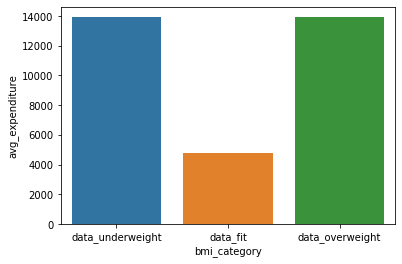

In [194]:
sns.barplot(x='bmi_category',y='avg_expenditure',data=df)
plt.show()

In [ ]:
## 13. Draw line plot of expenditure against age and BMI

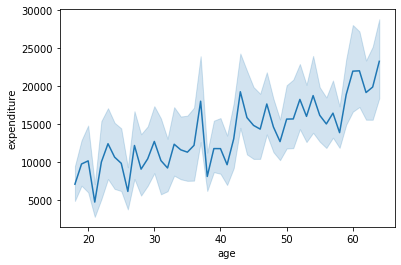

In [202]:
sns.lineplot(x='age',y='expenditure',data=data)
plt.show()

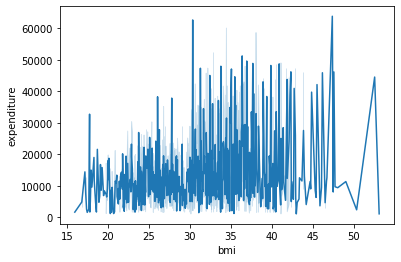

In [201]:
sns.lineplot(x='bmi',y='expenditure',data=data)
plt.show()

In [ ]:
## 14. Draw a bar chart to show zone wise average expenditure

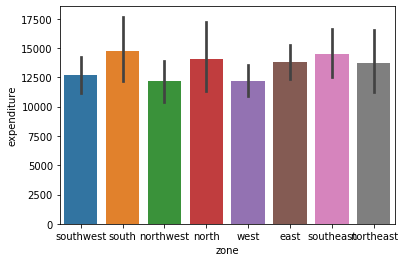

In [200]:
sns.barplot(x='zone',y='expenditure',data=data)
plt.show()

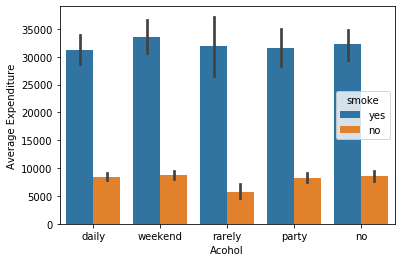

In [208]:
## 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure
a=sns.barplot(x='alcohol',y='expenditure',hue = 'smoke',data = data)
a.set(xlabel="Acohol", ylabel = "Average Expenditure")
plt.show()

In [233]:
## 16. Draw pie chart for alcohol consumption habits
a=data.groupby('alcohol').count()['id']
a

alcohol
daily      395
no         259
party      278
rarely      59
weekend    347
Name: id, dtype: int64

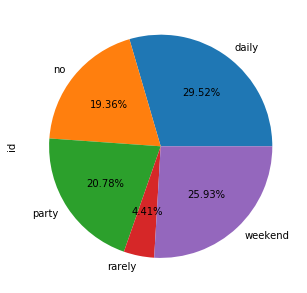

In [234]:
plt.figure(figsize=(5,8))
a.plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
## 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

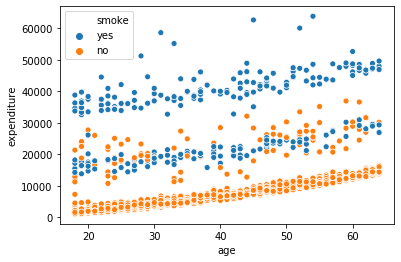

In [241]:
sns.scatterplot(x='age',y='expenditure',data=data,hue='smoke')
plt.show()

In [ ]:
## 18. Draw distribution plot of expenditure

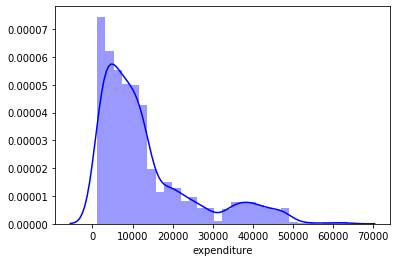

In [254]:
sns.distplot(data['expenditure'],color='b')
plt.show()

In [ ]:
## 19. Display the pairplot

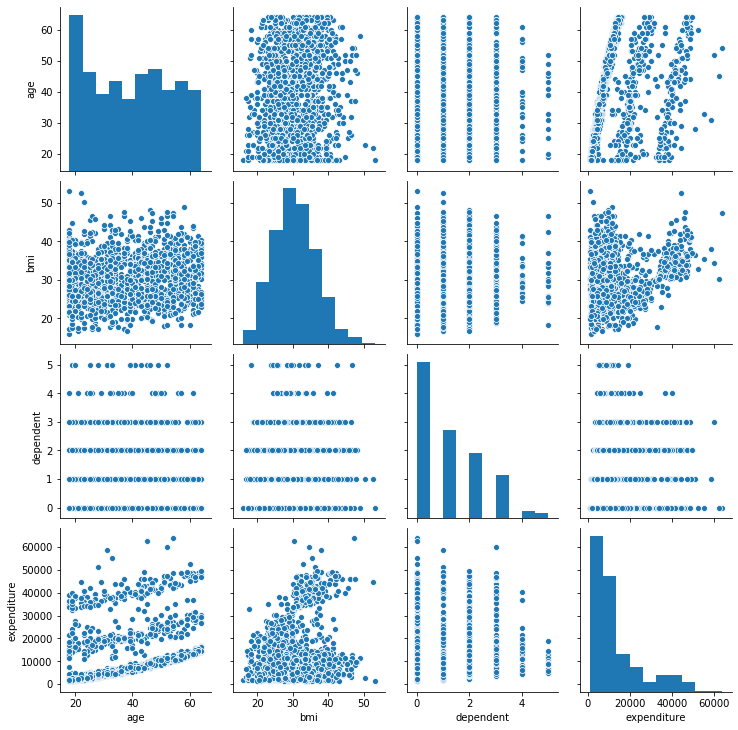

In [256]:
sns.pairplot(data)
plt.show()

In [2]:
## 20. Display heatmap for the data

In [257]:
data.corr()

,age,bmi,dependent,expenditure
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
dependent,0.042469,0.012759,1.000000,0.067998
expenditure,0.299008,0.198341,0.067998,1.000000


In [260]:
sns.set(rc={'figure.figsize':(8.7,6.7)})

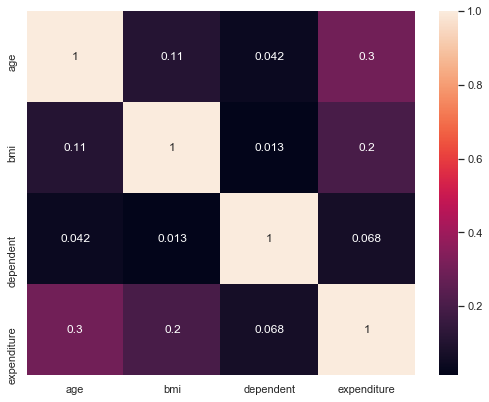

In [262]:
sns.heatmap(data.corr(),annot = True)
plt.show()